## - Exercici 1:

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

/Users/david/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('housing data.csv')

In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Dividim el dataframe en un 80% de dades per l'entrenament i un 20% per al test.

In [5]:
train, test = train_test_split(df, test_size = 0.20)

print("Dades emprades per entrenar: ", len(train))
print("Dades emprades per a test: ", len(test))

Dades emprades per entrenar:  404
Dades emprades per a test:  101


In [8]:
train.shape

(404, 14)

In [9]:
test.shape

(101, 14)

In [25]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
395,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5
243,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330.0,19.1,372.49,12.50,17.6
212,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38,28.1
473,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666.0,20.2,352.58,18.14,13.8
214,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277.0,18.6,393.63,9.47,25.0


In [26]:
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
449,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666.0,20.2,0.32,17.44,13.4
52,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4
37,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
387,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666.0,20.2,372.92,30.62,10.2
446,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666.0,20.2,388.52,16.44,12.6


Visualitzem la descripció de les dades del dataframe d'entrenament i de test:

In [23]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.360730,11.232673,11.152079,0.069307,0.552447,6.303040,67.957426,3.796636,9.168317,401.923267,18.347525,359.838787,12.412599,22.932673
std,8.945001,22.890728,6.865131,0.254290,0.115620,0.709738,27.787077,2.106602,8.409282,165.119031,2.184554,87.523255,7.051495,9.240585
min,0.009060,0.000000,0.460000,0.000000,0.389000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081960,0.000000,5.190000,0.000000,0.449000,5.887750,45.300000,2.116900,4.000000,278.500000,16.900000,376.140000,6.927500,17.575000
50%,0.234405,0.000000,9.690000,0.000000,0.532000,6.210000,76.500000,3.167500,5.000000,330.000000,18.700000,391.770000,10.925000,21.500000
75%,2.496017,13.750000,18.100000,0.000000,0.624000,6.632000,93.300000,5.141475,8.000000,494.250000,20.200000,396.352500,16.245000,25.125000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.660414,11.821782,11.162970,0.069307,0.563852,6.208139,71.078218,3.785749,11.158416,434.603960,18.918812,343.616733,13.690891,20.918812
std,7.048719,25.189242,6.852784,0.255242,0.117597,0.674457,29.694715,2.122872,9.693021,180.498592,2.018302,104.835900,7.431504,8.930238
min,0.013600,0.000000,0.740000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,193.000000,13.000000,0.320000,1.980000,5.600000
25%,0.088260,0.000000,5.130000,0.000000,0.448000,5.875000,44.400000,1.951200,4.000000,287.000000,17.800000,368.740000,7.390000,14.300000
50%,0.402020,0.000000,8.140000,0.000000,0.538000,6.172000,87.600000,3.363300,5.000000,334.000000,20.200000,390.070000,13.110000,19.600000
75%,8.267250,0.000000,18.100000,0.000000,0.679000,6.490000,96.000000,5.214600,24.000000,666.000000,20.200000,395.600000,18.130000,24.600000
max,28.655800,95.000000,21.890000,1.000000,0.871000,8.069000,100.000000,10.585700,24.000000,666.000000,22.000000,396.900000,34.370000,50.000000


Veiem que hi ha petites diferencies entre ambdos sets. On aquestes diferencies son més notables es en les variables CRIM, RAD I TAX.

In [ ]:
Veiem quin tipus de dades son i una descripcio de cada variable:

In [12]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    percentage of lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
Fem el test de Spahiro Wilk per a cada una de les variables del conjunt de dades d'entrenament:

In [114]:
shapiro (train['CRIM'])

(0.4692043662071228, 6.912105882190721e-33)

In [100]:
shapiro (train['ZN'])

(0.5658820867538452, 1.8985004890074083e-30)

In [101]:
shapiro (train['INDUS'])

(0.9003534913063049, 1.3401581649703353e-15)

In [102]:
shapiro (train['CHAS'])

(0.25641393661499023, 3.3795745087911174e-37)

In [103]:
shapiro (train['NOX'])

(0.9344527125358582, 2.460430080161724e-12)

In [104]:
shapiro (train['RM'])

(0.959009051322937, 3.511816393242384e-09)

In [105]:
shapiro (train['AGE'])

(0.8933879137039185, 3.637786809286526e-16)

In [106]:
shapiro (train['DIS'])

(0.9024898409843445, 2.0251585798543347e-15)

In [107]:
shapiro (train['RAD'])

(0.667839765548706, 2.3562389311177204e-27)

In [108]:
shapiro (train['TAX'])

(0.8193376064300537, 5.7414464953431435e-21)

In [109]:
shapiro (train['PTRATIO'])

(0.9067384600639343, 4.692992820526029e-15)

In [110]:
shapiro (train['B'])

(0.4657668471336365, 5.750112818671597e-33)

In [111]:
shapiro (train['LSTAT'])

(0.9294169545173645, 7.00029986235029e-13)

In [112]:
shapiro (train['MEDV'])

(0.9231218695640564, 1.5797308123080556e-13)

Comprovem amb el test de Spahiro Wilk que totes les dades tenen una distribució normal, doncs cap dona un valor p per sota de l'alpha de 0.05.

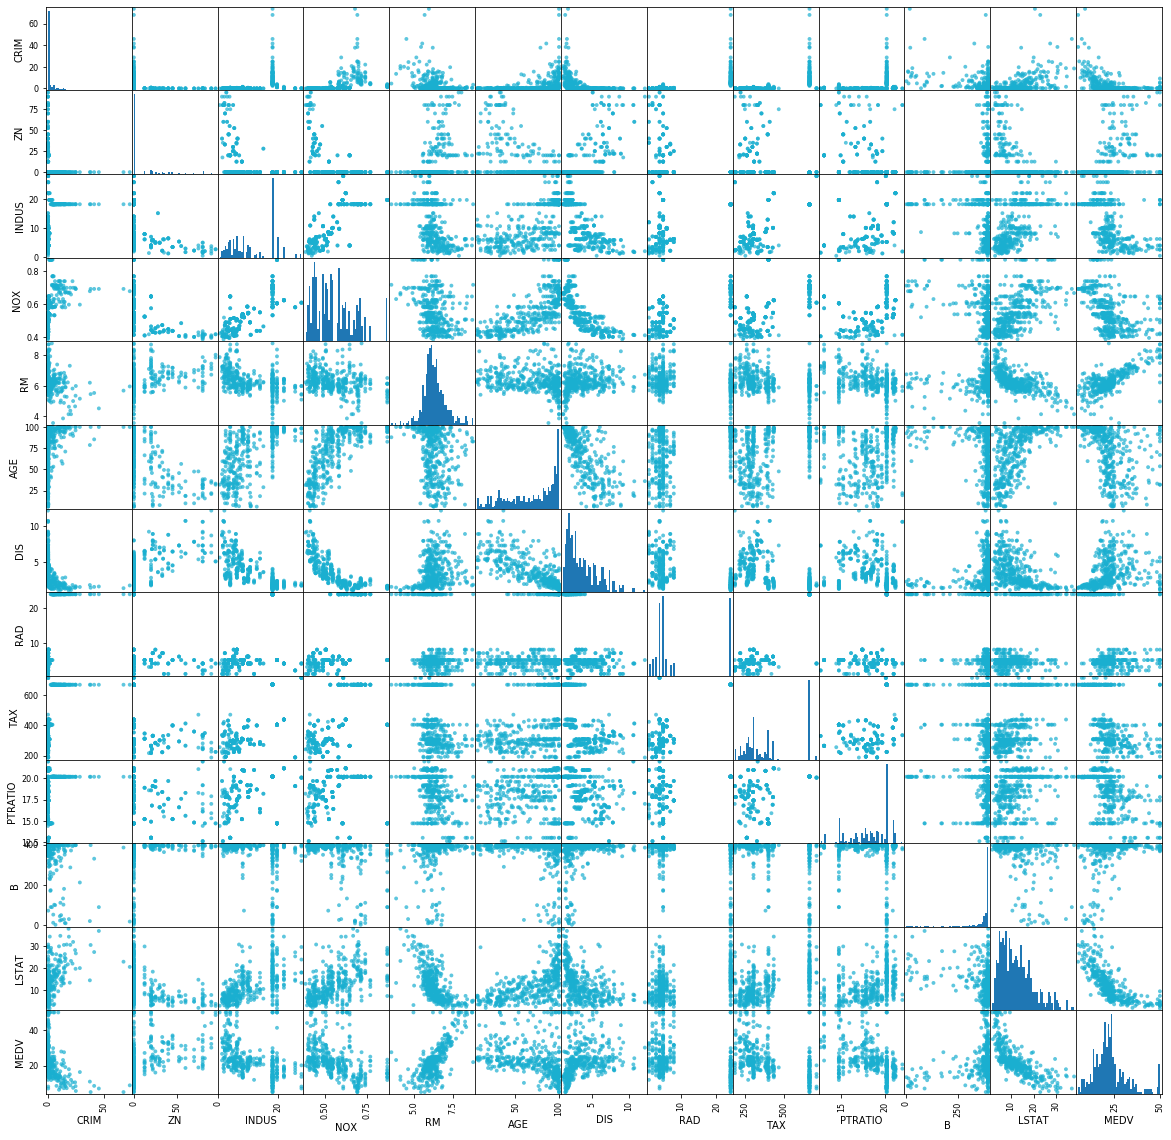

In [32]:
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.plotting.scatter_matrix(train[cols] , figsize= (20,20),  hist_kwds = {'bins': 50}, alpha = 0.7 
                           , color = '#1aafd0', s = 60); 

Fem el test de Spahiro Wilk per a cada una de les variables del conjunt de dades de test:

In [6]:
shapiro (test['CRIM'])

(0.7093642950057983, 7.634533738705429e-13)

In [7]:
shapiro (test['ZN'])

(0.5331590175628662, 2.2567551753255527e-16)

In [8]:
shapiro (test['INDUS'])

(0.8464714288711548, 7.768671927976811e-09)

In [9]:
shapiro (test['CHAS'])

(0.2758347988128662, 4.5841341421317245e-20)

In [10]:
shapiro (test['NOX'])

(0.9312635660171509, 5.4006100981496274e-05)

In [27]:
shapiro (test['RM'])

(0.9685864448547363, 0.0164283849298954)

In [12]:
shapiro (test['AGE'])

(0.8369075059890747, 3.526572811551887e-09)

In [13]:
shapiro (test['DIS'])

(0.9060666561126709, 2.497011337254662e-06)

In [14]:
shapiro (test['RAD'])

(0.7015280723571777, 4.979370323184018e-13)

In [15]:
shapiro (test['TAX'])

(0.7797415256500244, 5.3539638000810186e-11)

In [16]:
shapiro (test['PTRATIO'])

(0.8725640773773193, 7.939062385275975e-08)

In [17]:
shapiro (test['B'])

(0.5548743009567261, 5.365303093673383e-16)

In [20]:
shapiro (test['LSTAT'])

(0.9606906175613403, 0.004250264260917902)

In [19]:
shapiro (test['MEDV'])

(0.9142568111419678, 6.427766038541449e-06)

Veiem  amb el test de Spahiro Wilk que encara que la majoria de les dades tenen una distribució normal, les columnes RM i LSTAT tenen un valor p per sota de l'alpha de 0.05 i no tindrien doncs una distribució normal.

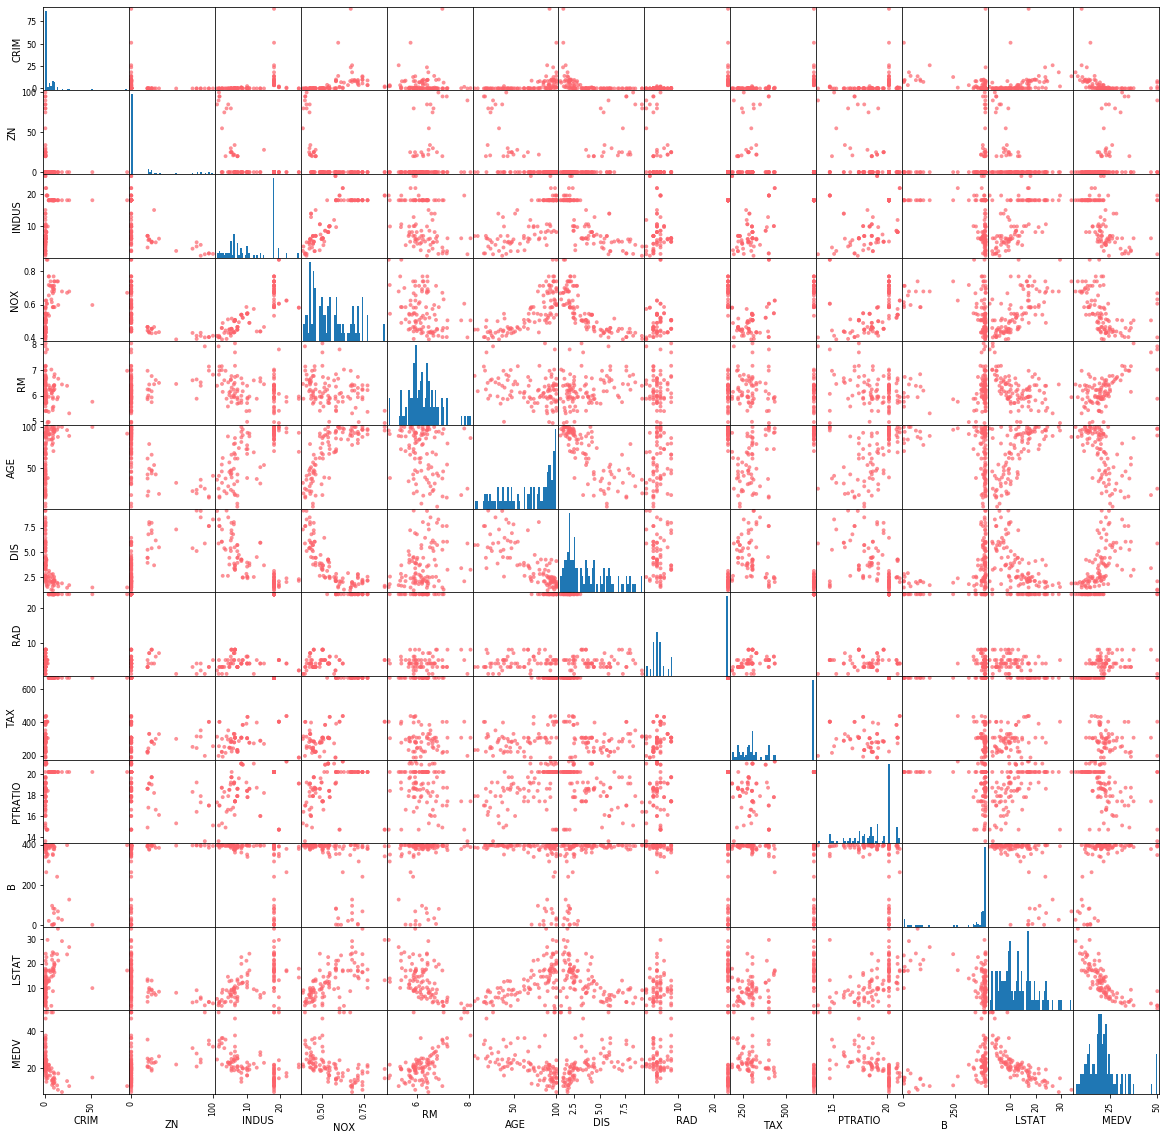

In [63]:
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.plotting.scatter_matrix(test[cols] , figsize= (20,20),  hist_kwds = {'bins': 50}, alpha = 0.7 
                           , color = '#fc636b', s = 60); 

Visualment podem veure relacions clares entre les següents columnes:<br>
- AGE i NOX
- DIS i NOX
- MEDV i RM
- MEDV i LSTAT
- TAX i RAD
- DIS i AGE

A continuació crearem un mapa de calor tant per al set d'entrenament com per al de test per veure les correlacions entre les diferents variables i comprovar si es confirmen les relacions que hem visualitzat.

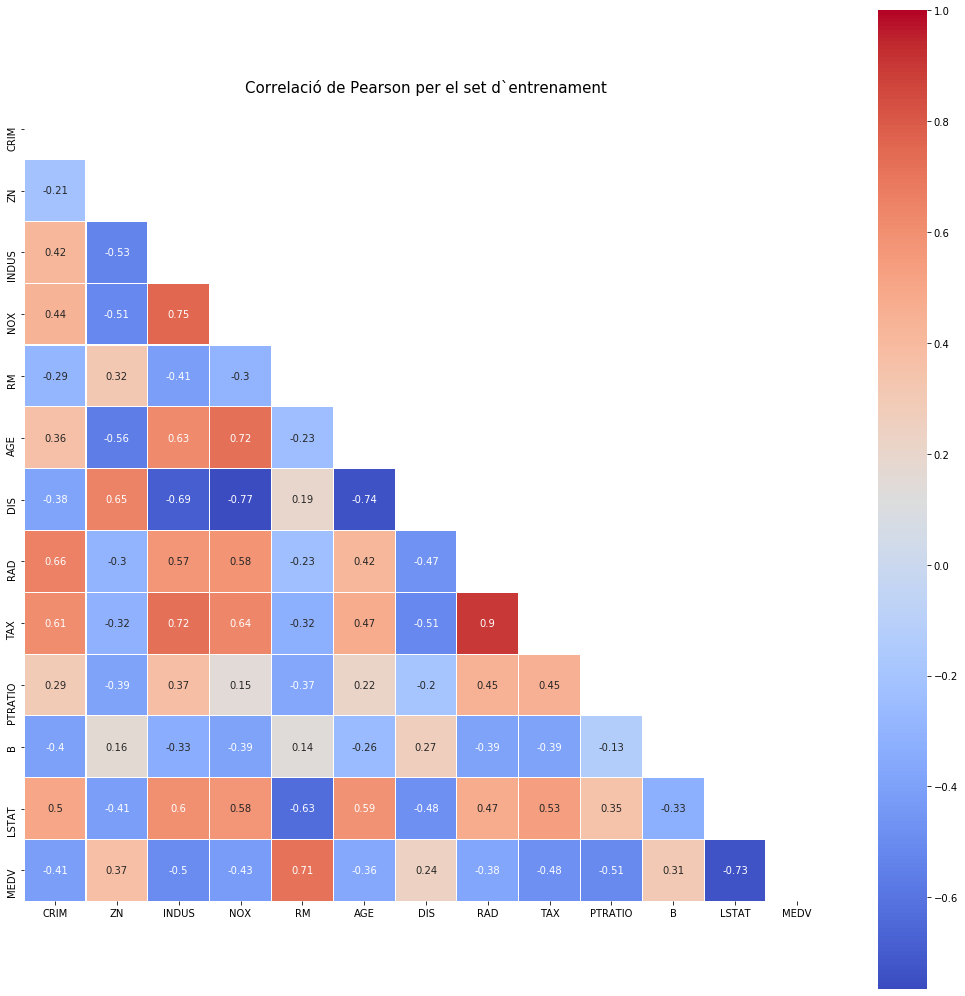

In [60]:
# Mapa de calor per les dades d'entrenament
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize = (18,18))

sns.heatmap(train[cols].corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True, mask= matrix)
plt.title('Correlació de Pearson per el set d`entrenament', y=1.05, size = 15); 

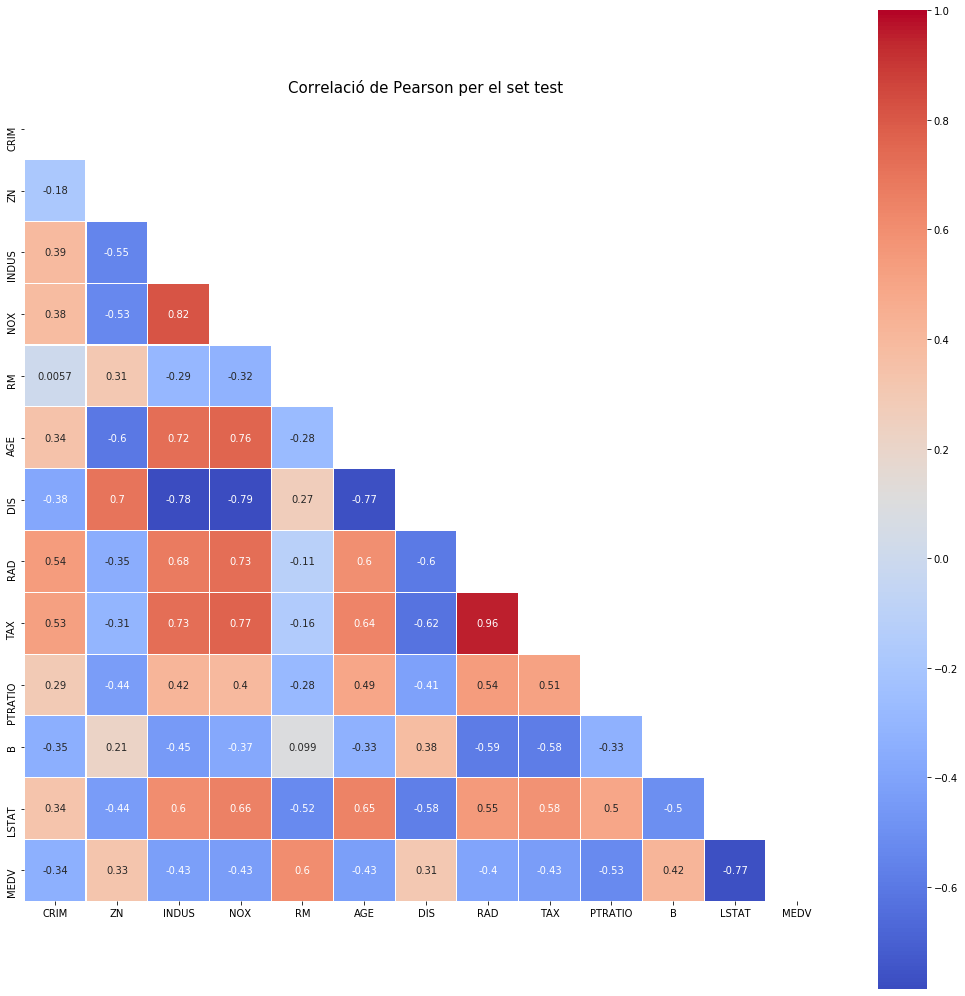

In [61]:
# Mapa de calor per les dades de test
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize = (18,18))

sns.heatmap(test[cols].corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True, mask= matrix)
plt.title('Correlació de Pearson per el set test', y=1.05, size = 15); 

La correlació més forta es dona entre la columna TAX i RAD.  Es a dir contra més cara es una propietat, doncs té un ratio d'impostos més elevat en relació al valor de la propietat, més accesibilitat a les autopistes radials tindrà.<br><br>
en segon lloc entre la columna NOX i INDUS, es a dir a mes superfície comercial no minorista, com poden ser magatzems, oficines, etc, mes concentració d'oxid nitric(NOX). aquesta relació es molt clara doncs relaciona directament l'activitat comercial a la contaminació per oxid nitric.<br><br>
DIS i NOX. en aquesta relació veiem que, com es negativa, a més distancia de centres de treball menys concentració d'oxid nitric(NOX). com probablement els centres de treball estan a zones com polígons industrials, contra més ens allunyem baixa la concentració del contaminant oxid nitric.<br><br>
DIS i AGE. en aquesta relació podem veure que contra més a prop dels centres de treball disminueix la proporció d'ocupació d'edificis construits abans del 1940. probablement perque els centres de treball estan allunyats del centre de la ciutat on si estan ubicats els edificis més antics.<br><br>
AGE i NOX. Aquí veiem que hi ha una forta correlació entre la quantitat d'habitatges ocupats pels seus propietaris construits abans de 1940 i la concentració d'oxid nitric. Això deu ser degut a que les propietats més antigues estan més a prop del centre, doncs la ciutat ha anat creixen al llarg dels anys. I al centre de les ciutats es on habitualment hi ha més contaminació degut a un major trànsit de vehicles i activitat comercial.<br><br>
TAX i INDUS. aquí podem veure com que a més alt es el valor de l'impost a la propietat mes alta es la proporció d'espai comercial no minorista, probablement perque les propietats més cares estan en aquelles arees de la ciutat on hi ha mes activitat comercial i oficines, que acostumen a ser al centre de la ciutat.<br><br>
MEDV i LSTAT. Aquí veiem que hi ha una forta correlació negativa entre el valor mitja de les vivendes ocupades pels seus propitaris i el percentatge de estatus baix de la població, és a dir, a mes valor de la propietat menys estataus baix, o lo que es igual estatus més alt.<br><br>
aquestes relacions es pot veure clarament que es donen tant en el set d'entrenament com en el de test.<br><br>
Dit això veiem que en general, a excepció de TAX i INDUS, les relaciones a nivell visual coincideixen a nivell numèric també.

# - Exercici 2:

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).


### Estandarització:

Apliquem un procés d'estandarització al dataframe.

Seleccionem les columnes que volem estandaritzar: 

In [41]:
df_standard = df.copy()
standard_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

standard_features = df_standard[standard_cols]
standard_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Instanciarem l'objecte escalador i aplicarem l'ajust i la transformació.

In [42]:
scaler = StandardScaler().fit(standard_features.values)
standard_features = scaler.transform(standard_features.values)

canviarem les columnes transformades al nostre dataframe estandaritzat.

In [43]:
df_standard[standard_cols] = standard_features
df_standard.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PollutionRate
0,-0.417830,-0.486716,-0.596322,-0.272888,-0.739831,0.194934,0.366571,0.556897,-0.869801,-0.988107,-0.306327,0.441573,-0.494647,-0.101111,Baixa contaminació
1,-0.417832,-0.486716,-0.596322,-0.272888,-0.739831,1.282481,-0.265790,0.556897,-0.869801,-0.988107,-0.306327,0.396984,-1.211048,1.323287,Baixa contaminació
2,-0.417242,-0.486716,-1.310287,-0.272888,-0.834761,1.016288,-0.809337,1.076969,-0.754844,-1.106827,0.110267,0.416704,-1.363862,1.181934,Baixa contaminació
3,-0.412977,-0.486716,-1.310287,-0.272888,-0.834761,1.228389,-0.510919,1.076969,-0.754844,-1.106827,0.110267,0.441573,-1.028793,1.486386,Baixa contaminació
4,-0.417535,-0.486716,-1.310287,-0.272888,-0.834761,0.207745,-0.351052,1.076969,-0.754844,-1.106827,0.110267,0.411117,-1.045617,0.670891,Baixa contaminació


In [44]:
df_standard[standard_cols].describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.46,-3.88,-2.33,-1.27,-0.98,-1.31,-2.71,-3.90,-1.53,-1.91
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.80,-0.64,-0.77,-0.49,0.21,-0.79,-0.60
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.47,0.30,0.38,-0.18,-0.14
75%,0.01,0.05,1.01,-0.27,0.60,0.49,0.91,0.67,1.66,1.53,0.80,0.43,0.60,0.27
max,9.93,3.80,2.42,3.66,2.73,3.55,1.12,3.96,1.66,1.80,1.64,0.44,3.55,2.99


Com que hem estandarditzat les dades ara tenen una mitjana de zero i una desviació estàndard d'un.
A primera vista veiem que en general les dades son força homogenies, només en el cas de CRIM, podriem considerar que presenta outliers.
Veiem que en a excepció de AGE, PTRATIO i B, a la resta el 50% dels valors son negatius (valors per sota de la mitjana), cosa que ens indica que les distribucions poden estar força esbiaixades.

Ara farem un boxplot de les noves dades estandaritzades.

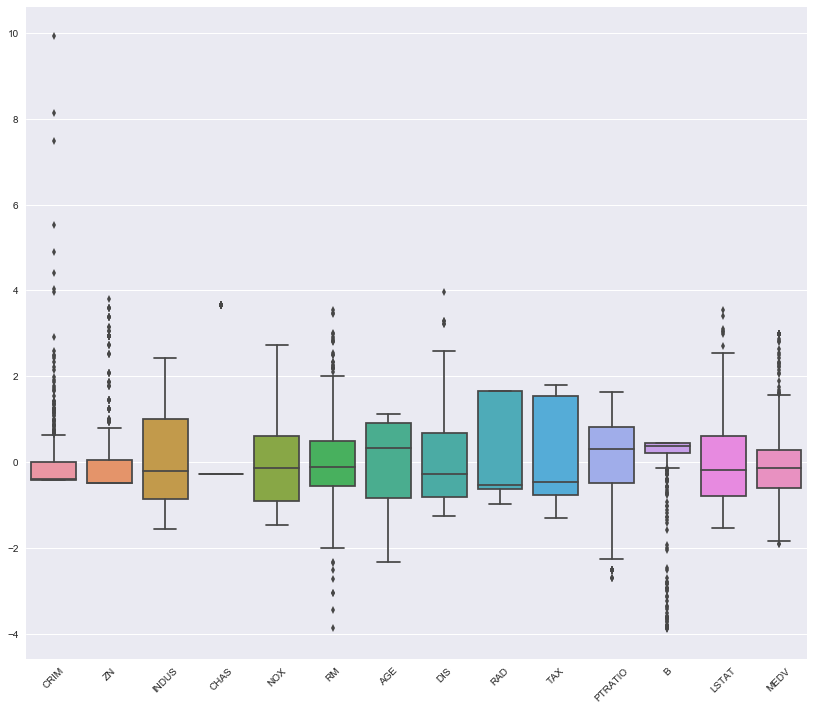

In [29]:
plt.figure(figsize=(14,12))
sns.boxplot(data = data_standard[standard_cols])
plt.xticks(rotation = 45);
plt.show()

En aquest boxplot veiem que la columna CRIM presenta un nombre significatiu d'outliers per sobre de la mitjana, mentres que ZN, DIS, LSTAT i MEDV presenten alguns però sense allunyarse massa de la mitjana, mentres que la columna B i PTRATIO presente outliers per sota de la mitaja i de la mateixa manera tampoc gaire lluny de la linia que marca la mitjana. Pel que fa a la columna RM, presenta outliers tant per sobre com per sota de la mitjana, però a prop d'ella. La resta de columnes no en tenen. 

#### Columnes Dummies:

primer de tot creem una columna categorica que mostrarà la ratio de contaminació.

In [5]:
def pollution_rate(x): 
    if x < 0.50: 
        return "Baixa contaminació"
    elif x > 0.50 and x < 0.60: 
        return "Contaminació mitjana"
    elif x > 0.60: 
        return "Alta contaminació"


df['PollutionRate'] = df['NOX'].apply(pollution_rate)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PollutionRate
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Baixa contaminació
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Baixa contaminació
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,Baixa contaminació
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Baixa contaminació
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7,Baixa contaminació


En el següent pas creem un nou dataframe amb les tres noves columnes dummies.

In [38]:
df_dummies = pd.get_dummies(df, columns=["PollutionRate"], prefix="Columna")


print("DataFrame amb Dummies:")
df_dummies.head()

DataFrame amb Dummies:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Columna_Alta contaminació,Columna_Baixa contaminació,Columna_Contaminació mitjana
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,1,0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,1,0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,1,0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,1,0
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7,0,1,0


In [6]:
interval = df['PollutionRate'].value_counts(normalize= True).round(2)
interval

Baixa contaminació      0.38
Alta contaminació       0.33
Contaminació mitjana    0.29
Name: PollutionRate, dtype: float64

Veiem que un 38% tenen baixa contaminació, un 29% contaminació mitjana i un 33% alta contaminació.

Ara ho visualitzarem de manera gràfica:

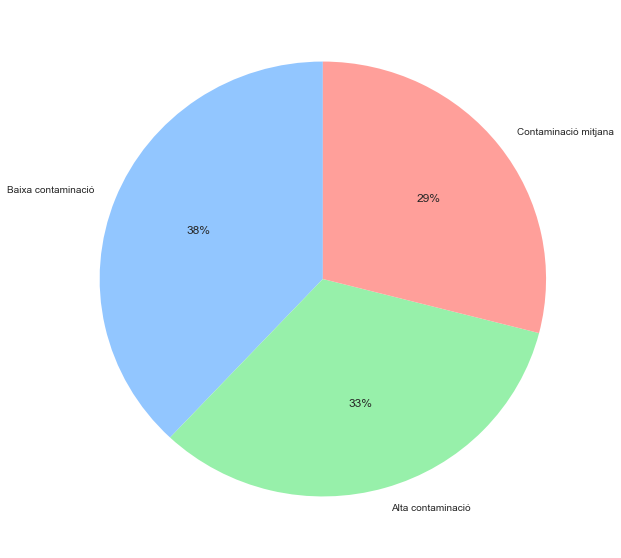

In [20]:
labels = ['Baixa contaminació', 'Alta contaminació ', 'Contaminació mitjana']
colors = sns.color_palette('pastel')
plt.figure(figsize=(10,10))
plt.pie(interval, labels = labels, colors = colors, startangle=90, autopct='%.0f%%')
plt.show()